In [1]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
path = 'D:\Deep Learning Projects\Face Mask Detection\data\with_mask'
with_mask_files = os.listdir(path)
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [3]:
path = 'D:\Deep Learning Projects\Face Mask Detection\data\without_mask'
without_mask_files = os.listdir(path)
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [4]:
print("Number of with mask images:",len(with_mask_files))
print("Number of with mask images:",len(without_mask_files))

Number of with mask images: 3725
Number of with mask images: 3828


In [5]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [6]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
labels = with_mask_labels + without_mask_labels

In [8]:
len(labels)

7553

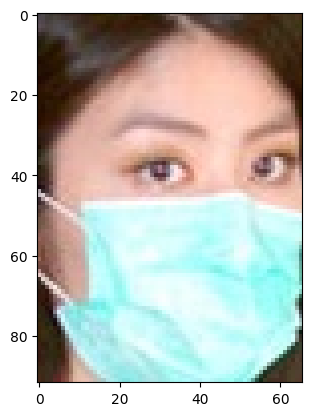

In [11]:
img = cv2.imread('data\with_mask\with_mask_3.jpg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [15]:
with_mask_dir = 'data/with_mask/'
without_mask_dir = 'data/without_mask/'

data = []

# Load images with masks
with_mask_files = os.listdir(with_mask_dir)
for img_file in with_mask_files:
    image = Image.open(os.path.join(with_mask_dir, img_file))  # Use os.path.join to handle path concatenation
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Load images without masks
without_mask_files = os.listdir(without_mask_dir)
for img_file in without_mask_files:
    image = Image.open(os.path.join(without_mask_dir, img_file))  # Use os.path.join to handle path concatenation
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


C:\new_anaconda\envs\tf1\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [16]:
type(data)

list

In [17]:
len(data)

7553

In [24]:
X = np.array(data)
y = np.array(labels)

In [25]:
print(X.shape)

(7553, 128, 128, 3)


In [26]:
print(Y.shape)

(7553,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape,y_train)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3) [1 0 1 ... 0 1 0]


In [28]:
scaled_X_train = X_train / 255

scaled_X_test = X_test / 255

In [29]:
X_train[0]

array([[[226, 234, 201],
        [211, 216, 188],
        [188, 188, 169],
        ...,
        [186, 181, 165],
        [179, 175, 150],
        [166, 181, 136]],

       [[224, 228, 218],
        [201, 204, 195],
        [201, 199, 192],
        ...,
        [197, 190, 182],
        [175, 170, 153],
        [162, 180, 143]],

       [[205, 204, 212],
        [221, 220, 226],
        [195, 192, 196],
        ...,
        [183, 174, 173],
        [172, 167, 159],
        [181, 199, 171]],

       ...,

       [[156, 176, 197],
        [159, 180, 196],
        [164, 185, 196],
        ...,
        [ 89,  99,  71],
        [106, 113,  83],
        [ 99, 103,  68]],

       [[151, 177, 196],
        [167, 190, 208],
        [174, 192, 210],
        ...,
        [106, 113,  80],
        [ 99, 104,  64],
        [ 98,  98,  41]],

       [[162, 192, 210],
        [177, 199, 220],
        [175, 189, 213],
        ...,
        [103, 107,  70],
        [ 79,  80,  46],
        [ 99,  94,  61]]

In [30]:
scaled_X_train[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

In [31]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [40]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='sigmoid'))

In [41]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [42]:
trained_model = model.fit(scaled_X_train,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 199s 1s/step - loss: 0.4868 - accuracy: 0.7752 - val_loss: 0.2657 - val_accuracy: 0.8876
Epoch 2/5
170/170 [==============================] - 185s 1s/step - loss: 0.3089 - accuracy: 0.8808 - val_loss: 0.2774 - val_accuracy: 0.8893
Epoch 3/5
170/170 [==============================] - 186s 1s/step - loss: 0.2609 - accuracy: 0.8983 - val_loss: 0.2392 - val_accuracy: 0.8992
Epoch 4/5
170/170 [==============================] - 184s 1s/step - loss: 0.2146 - accuracy: 0.9187 - val_loss: 0.2130 - val_accuracy: 0.9306
Epoch 5/5
170/170 [==============================] - 185s 1s/step - loss: 0.1989 - accuracy: 0.9251 - val_loss: 0.2119 - val_accuracy: 0.9306


In [43]:
loss,accuracy = model.evaluate(scaled_X_test,y_test)
print(accuracy)

48/48 [==============================] - 15s 305ms/step - loss: 0.2091 - accuracy: 0.9265
0.9265387058258057


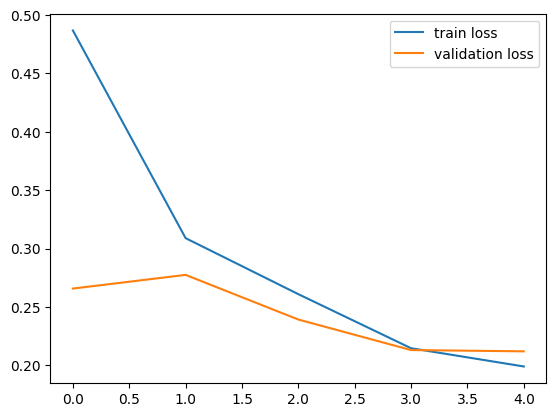

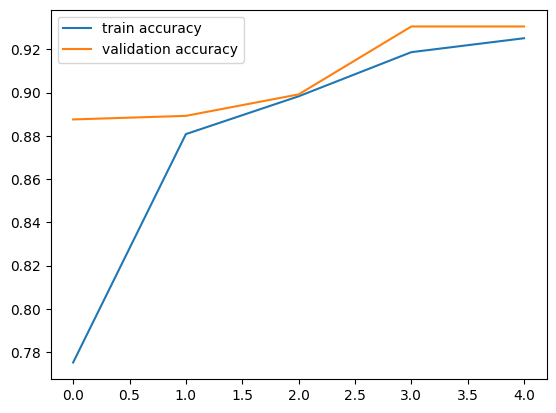

In [47]:
h = trained_model

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Enter the path of the image to be predicted:  test_img.jpg


[[0.28510383 0.7909509 ]]
1
The person in the image is wearing a mask


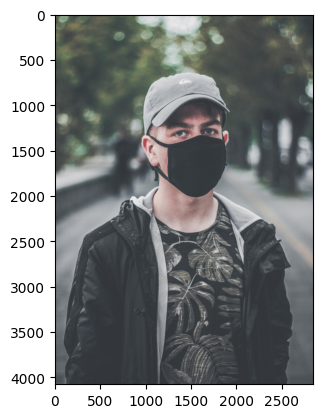

In [53]:
input_image_path = input('Enter the path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

image_rgb_resized = cv2.resize(image_rgb,(128,128))

image_rgb_scaled = image_rgb_resized / 255

image_rgb_reshaped = np.reshape(image_rgb_scaled,[1,128,128,3])

input_pred = model.predict(image_rgb_reshaped)

print(input_pred)

input_pred_label = np.argmax(input_pred)

print(input_pred_label)

if input_pred_label ==1:
    print("The person in the image is wearing a mask")

else:
    print('The person in the image is not wearing a mask')

Enter the path of the image to be predicted:  test_img_2.jpg


[[0.8180505  0.16345137]]
0
The person in the image is not wearing a mask


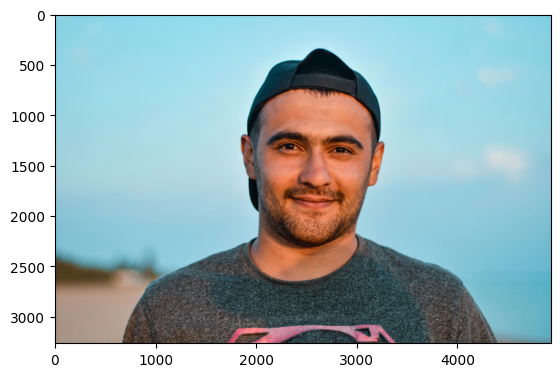

In [54]:
input_image_path = input('Enter the path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

image_rgb_resized = cv2.resize(image_rgb,(128,128))

image_rgb_scaled = image_rgb_resized / 255

image_rgb_reshaped = np.reshape(image_rgb_scaled,[1,128,128,3])

input_pred = model.predict(image_rgb_reshaped)

print(input_pred)

input_pred_label = np.argmax(input_pred)

print(input_pred_label)

if input_pred_label ==1:
    print("The person in the image is wearing a mask")

else:
    print('The person in the image is not wearing a mask')